In [18]:
# import the required packages (please check! you might not need all)
#test
import numpy as np
import pandas as pd
from datetime import datetime, timezone
from matplotlib.dates import date2num, num2date
from os.path import join
import matplotlib.pyplot as plt
from matplotlib.path import Path
import glob
import os
import time
import matplotlib.dates as md
from netCDF4 import Dataset # pylint: disable=no-name-in-module
from sklearn.metrics import mean_absolute_error
from scipy import stats
from sklearn import linear_model

In [19]:
### PLOTTING BUCHILLON

input_folder = r'C:\Users\claud\Documents\Geographie-Studium-6. Semester\ESS374\03_GitHub\WASY\data\Geneva\skin_temp\BUC_1m'

os.chdir(input_folder)

# Create a list with all the files
path = os.getcwd()
allfiles = os.listdir(path)

tempfiles = [f for f in allfiles if f[-3:] == ".nc"]
tempfiles = [f for f in tempfiles if f[0] != "~"] # in case there is an open file
fileslist = tempfiles
f = Dataset(fileslist[0], 'r')
f.variables.keys()

dict_keys(['time', 'AirTemp10m_Avg', 'AirTemp10m_Avg_qual', 'AirTemp7m_Avg', 'AirTemp7m_Avg_qual', 'BP_QFE', 'BP_QFE_qual', 'BP_QFF', 'BP_QFF_qual', 'BattV_Avg', 'BattV_Min', 'CDM1BattV_Avg', 'CDM1PTempC1_Avg', 'CDM1PTempC2_Avg', 'DewP_Avg', 'DewP_Avg_qual', 'Gust_Max', 'Gust_Max_qual', 'Mean_Wind_Dir', 'Mean_Wind_Dir_qual', 'Mean_Wind_Speed', 'Mean_Wind_Speed_qual', 'PTemp_C_Avg', 'RECORD', 'RH_Avg', 'RH_Avg_qual', 'Rain_mm_Tot', 'Rain_mm_Tot_qual', 'SolarW', 'SolarW_qual', 'SolarWh_Tot', 'SolarWh_Tot_qual', 'WaterTemp0mKT15a_Avg', 'WaterTemp0mKT15n_Avg', 'WaterTemp1m_Avg', 'WaterTemp1m_Avg_qual', 'WaterTemp35m_Avg', 'WaterTemp35m_Avg_qual'])

In [20]:
ii = 0
f = Dataset(fileslist[ii], 'r')
time_arr = np.array(f.variables['time'][:])
skintemp_arr = np.array(f.variables['WaterTemp0mKT15a_Avg'][:])
bulktemp_arr = np.array(f.variables['WaterTemp1m_Avg'][:])
airtemp_arr = np.array(f.variables['AirTemp7m_Avg'][:])
rain_arr = np.array(f.variables['Rain_mm_Tot'][:])
wind_arr = np.array(f.variables['Mean_Wind_Speed'][:])
solar_arr = np.array(f.variables['SolarW'][:])
pressure_arr = np.array(f.variables['BP_QFE'][:])
humidity_arr = np.array(f.variables['RH_Avg'][:])
f.close()

for ii in range(1,len(fileslist)):
    f = Dataset(fileslist[ii], 'r')
    time_arr = np.concatenate([time_arr,np.array(f.variables['time'][:])])
    skintemp_arr = np.concatenate([skintemp_arr,np.array(f.variables['WaterTemp0mKT15a_Avg'][:])])
    bulktemp_arr = np.concatenate([bulktemp_arr,np.array(f.variables['WaterTemp1m_Avg'][:])])
    airtemp_arr = np.concatenate([airtemp_arr, np.array(f.variables['AirTemp7m_Avg'][:])])
    rain_arr = np.concatenate([rain_arr, np.array(f.variables['Rain_mm_Tot'][:])])
    wind_arr = np.concatenate([wind_arr, np.array(f.variables['Mean_Wind_Speed'][:])])
    solar_arr = np.concatenate([solar_arr, np.array(f.variables['SolarW'][:])])
    pressure_arr = np.concatenate([pressure_arr, np.array(f.variables['BP_QFE'][:])])
    humidity_arr = np.concatenate([humidity_arr, np.array(f.variables['RH_Avg'][:])])
    f.close()
date_arr = [datetime.fromtimestamp(ts) for ts in time_arr]


In [21]:
buchillon_skin_bulk_meteo = pd.DataFrame(index= date_arr, columns = ['skintemp', 'bulktemp', 'airtemp', 'precipitation', 'windspeed', 'solar_W', 'timestamp']) #what is solar W?
buchillon_skin_bulk_meteo['skintemp'] = skintemp_arr
buchillon_skin_bulk_meteo['bulktemp'] = bulktemp_arr
buchillon_skin_bulk_meteo['airtemp'] = airtemp_arr
buchillon_skin_bulk_meteo['precipitation'] = rain_arr
buchillon_skin_bulk_meteo['windspeed'] = wind_arr
buchillon_skin_bulk_meteo['solar_W'] = solar_arr
buchillon_skin_bulk_meteo['timestamp'] = time_arr
buchillon_skin_bulk_meteo['rel_humidity'] = humidity_arr
buchillon_skin_bulk_meteo['air_pressure'] = pressure_arr
buchillon_skin_bulk_meteo = buchillon_skin_bulk_meteo.sort_index()
#buchillon_skin_bulk_meteo.to_csv('/Users/olbu/Documents/uni/FS_23/WASY/project_code/data/output/buc_skin_meteo.csv')


In [22]:
buchillon_skin_bulk_meteo.dtypes

skintemp         float64
bulktemp         float64
airtemp          float64
precipitation    float64
windspeed        float64
solar_W          float64
timestamp        float64
rel_humidity     float64
air_pressure     float64
dtype: object

Text(0.5, 0, 'Timestamp')

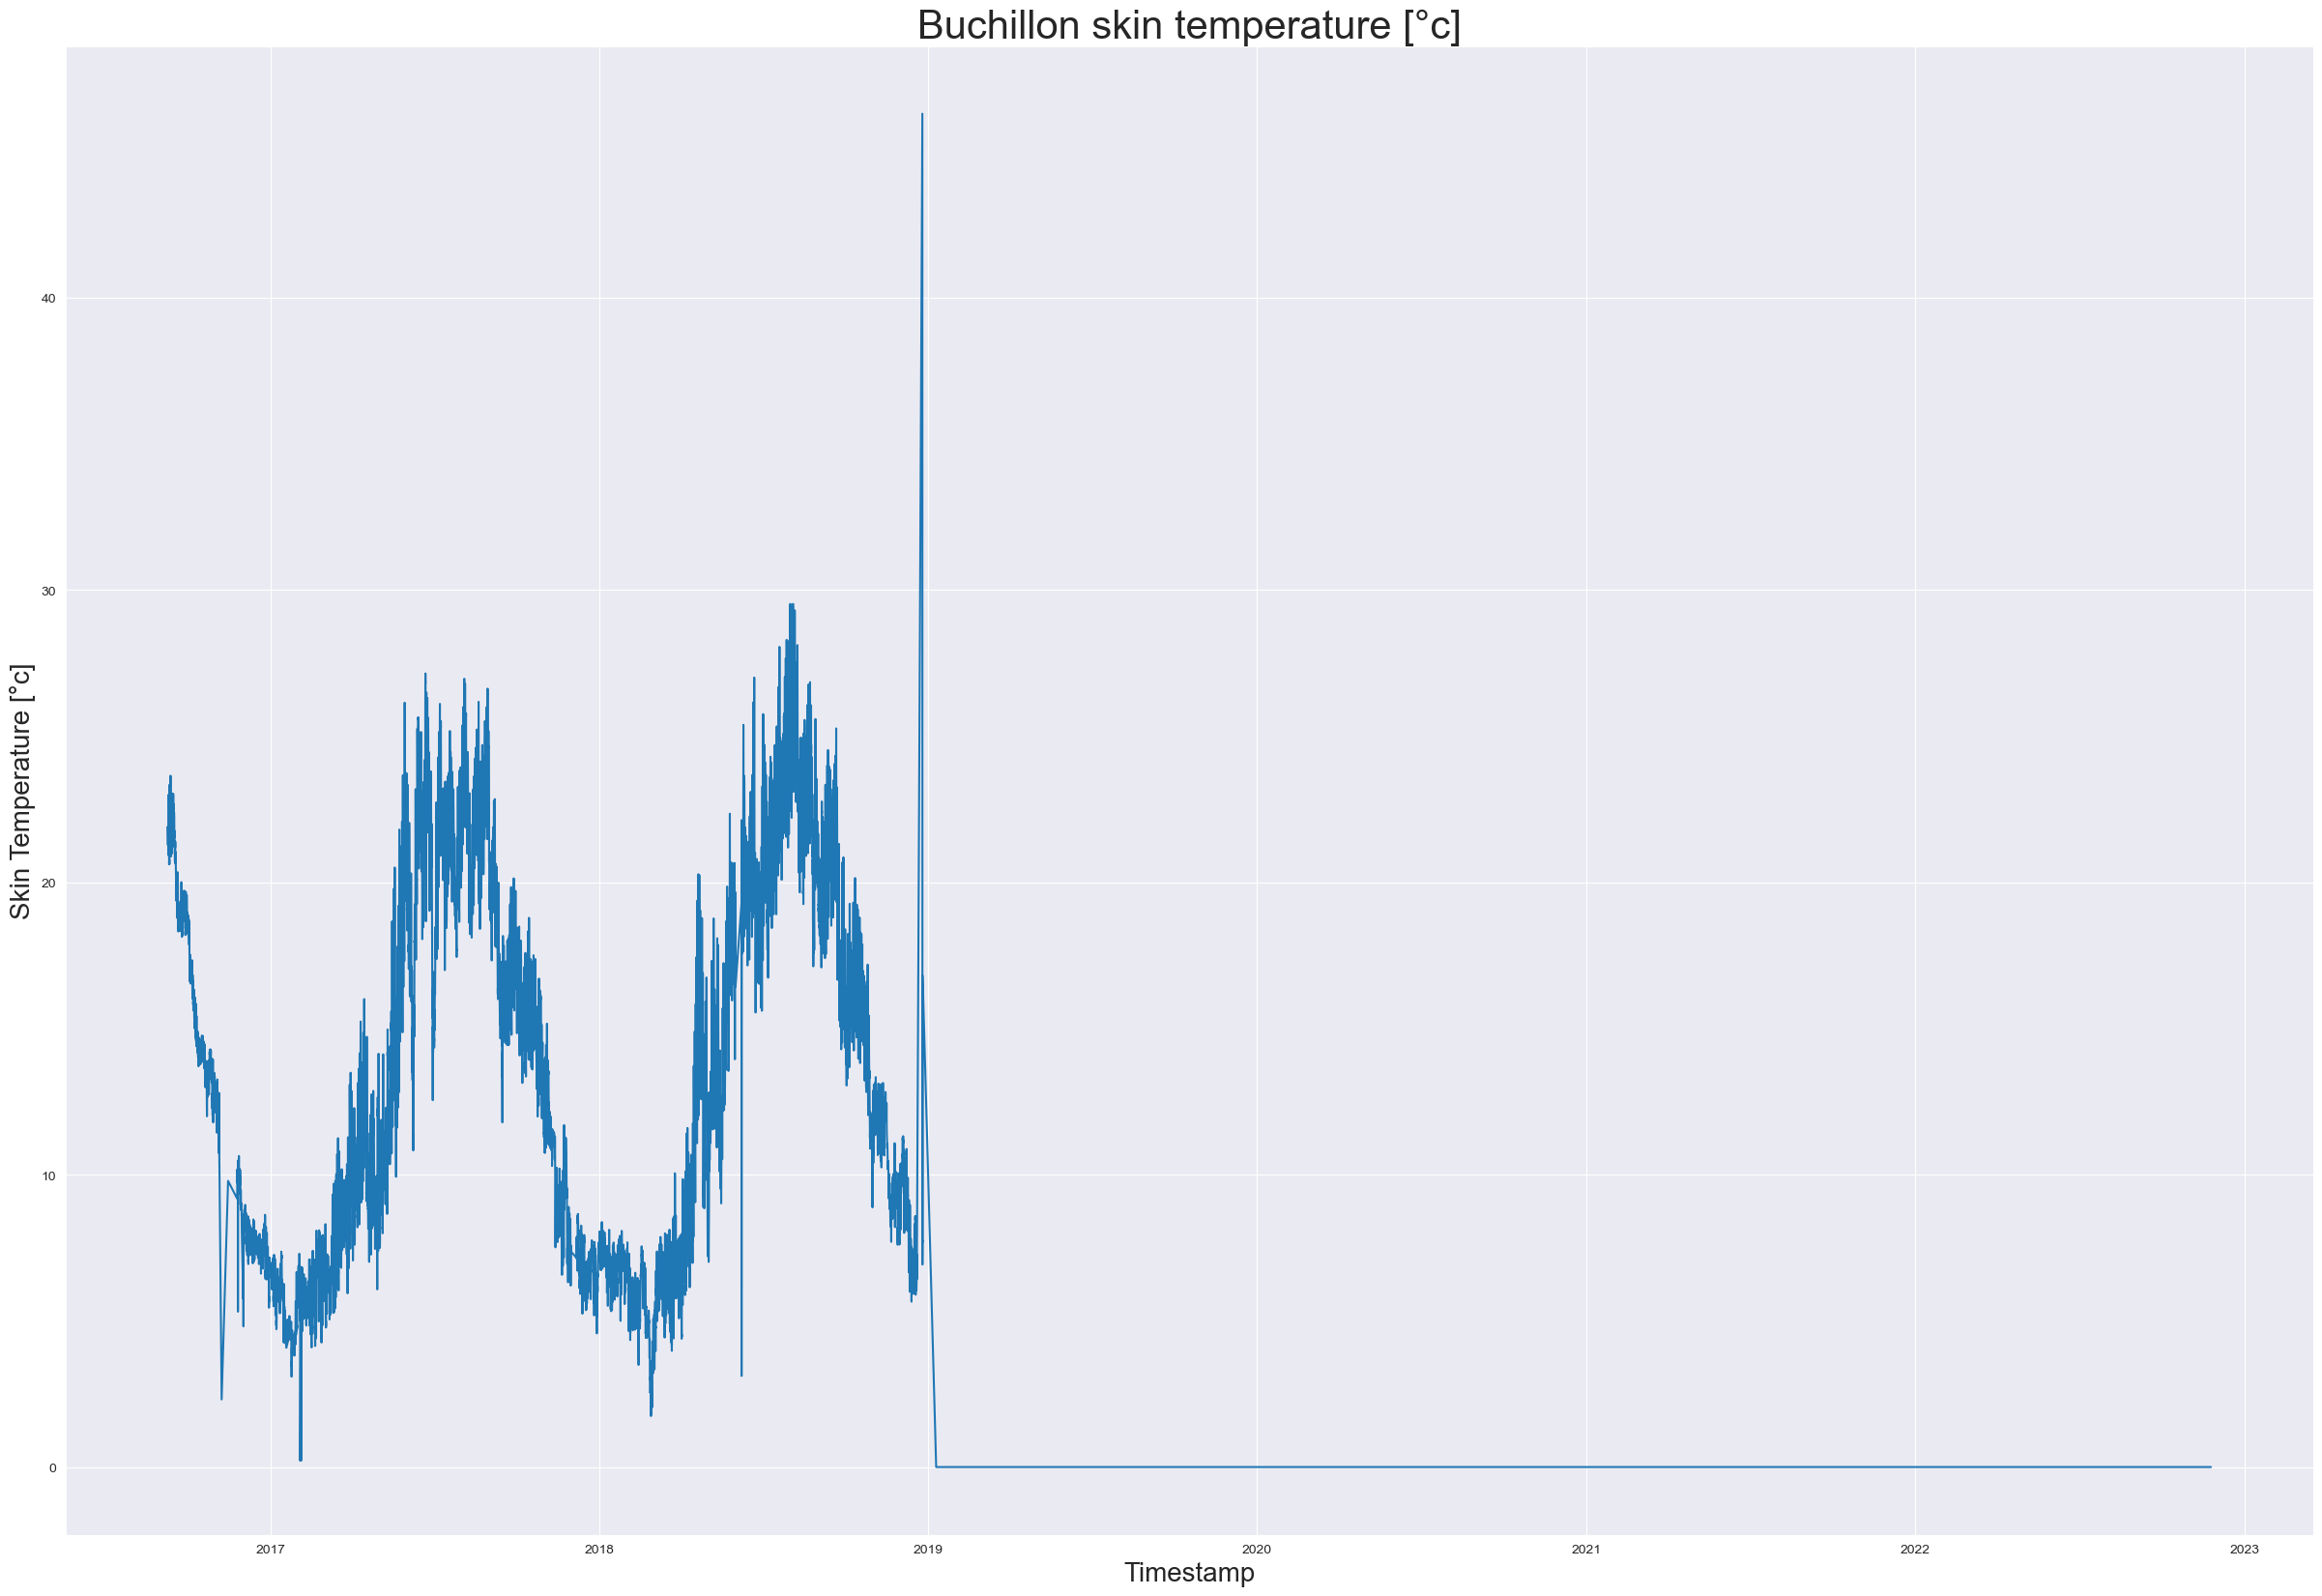

In [23]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (30, 20)
plt.plot(buchillon_skin_bulk_meteo.index, buchillon_skin_bulk_meteo['skintemp'])
plt.title("Buchillon skin temperature [°c]", fontsize = 30)
plt.ylabel("Skin Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)


Text(0.5, 0, 'Timestamp')

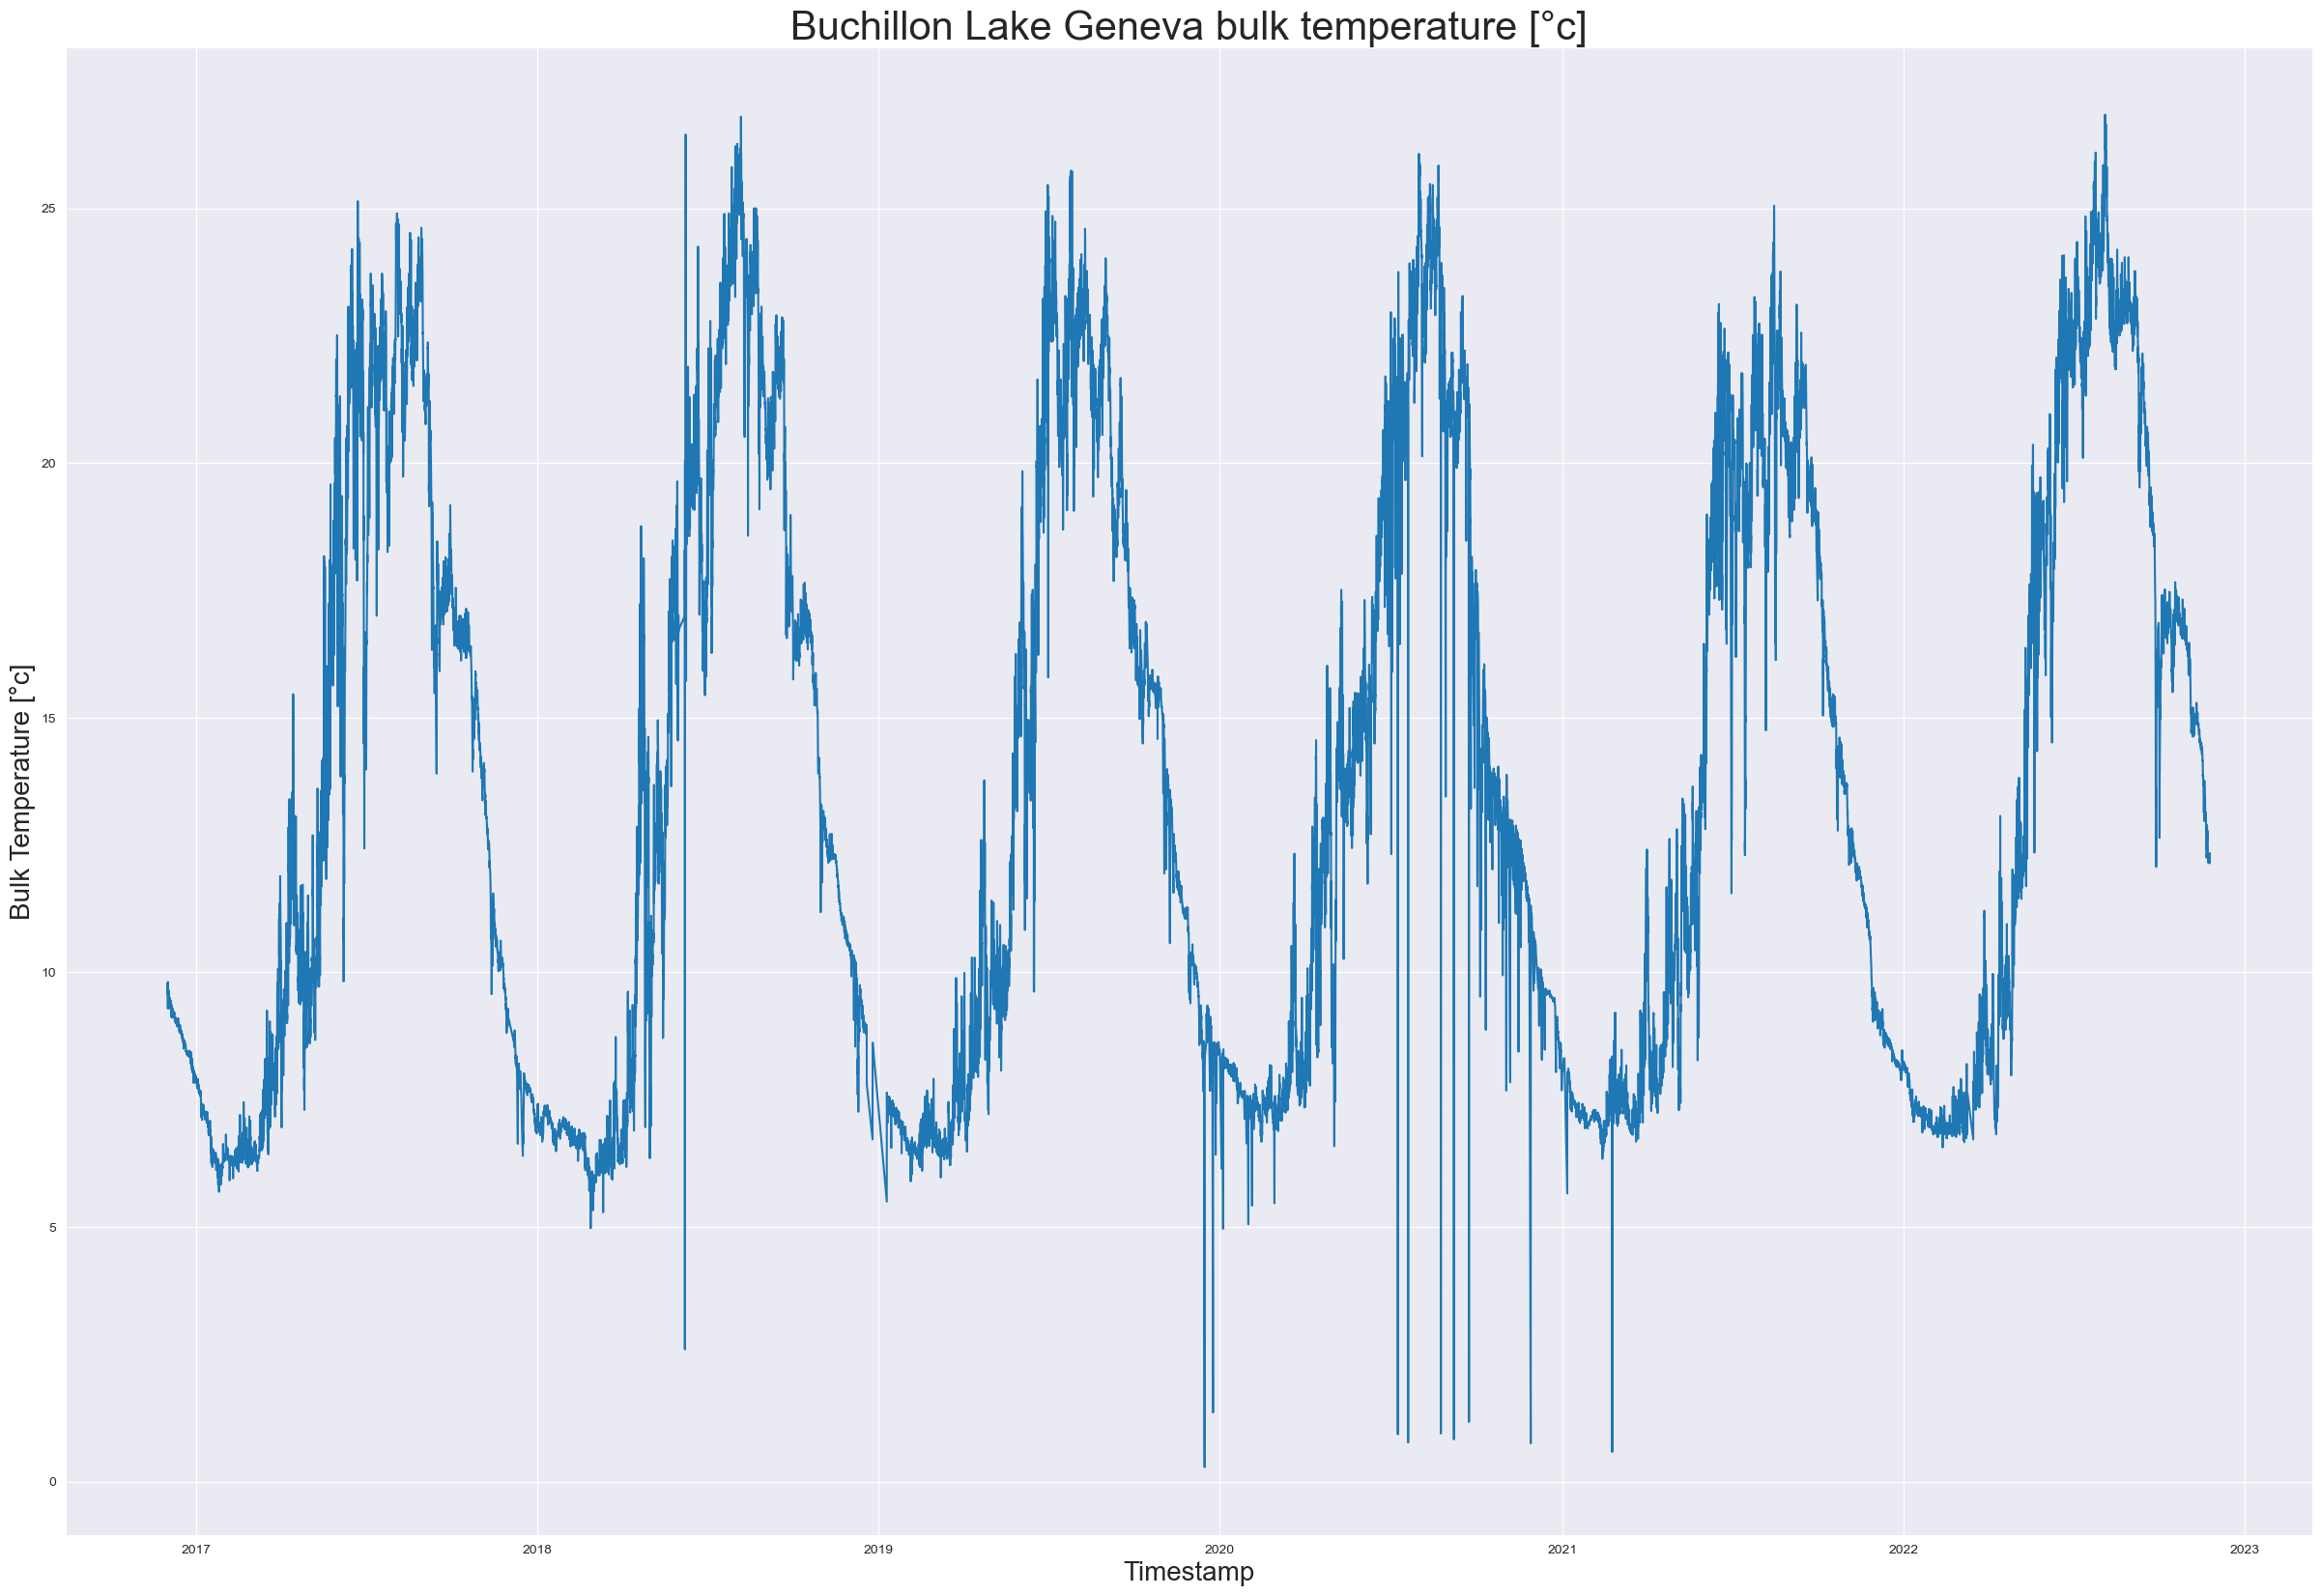

In [24]:
plt.plot(buchillon_skin_bulk_meteo['bulktemp'])
plt.title("Buchillon Lake Geneva bulk temperature [°c]", fontsize = 30)
plt.ylabel("Bulk Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

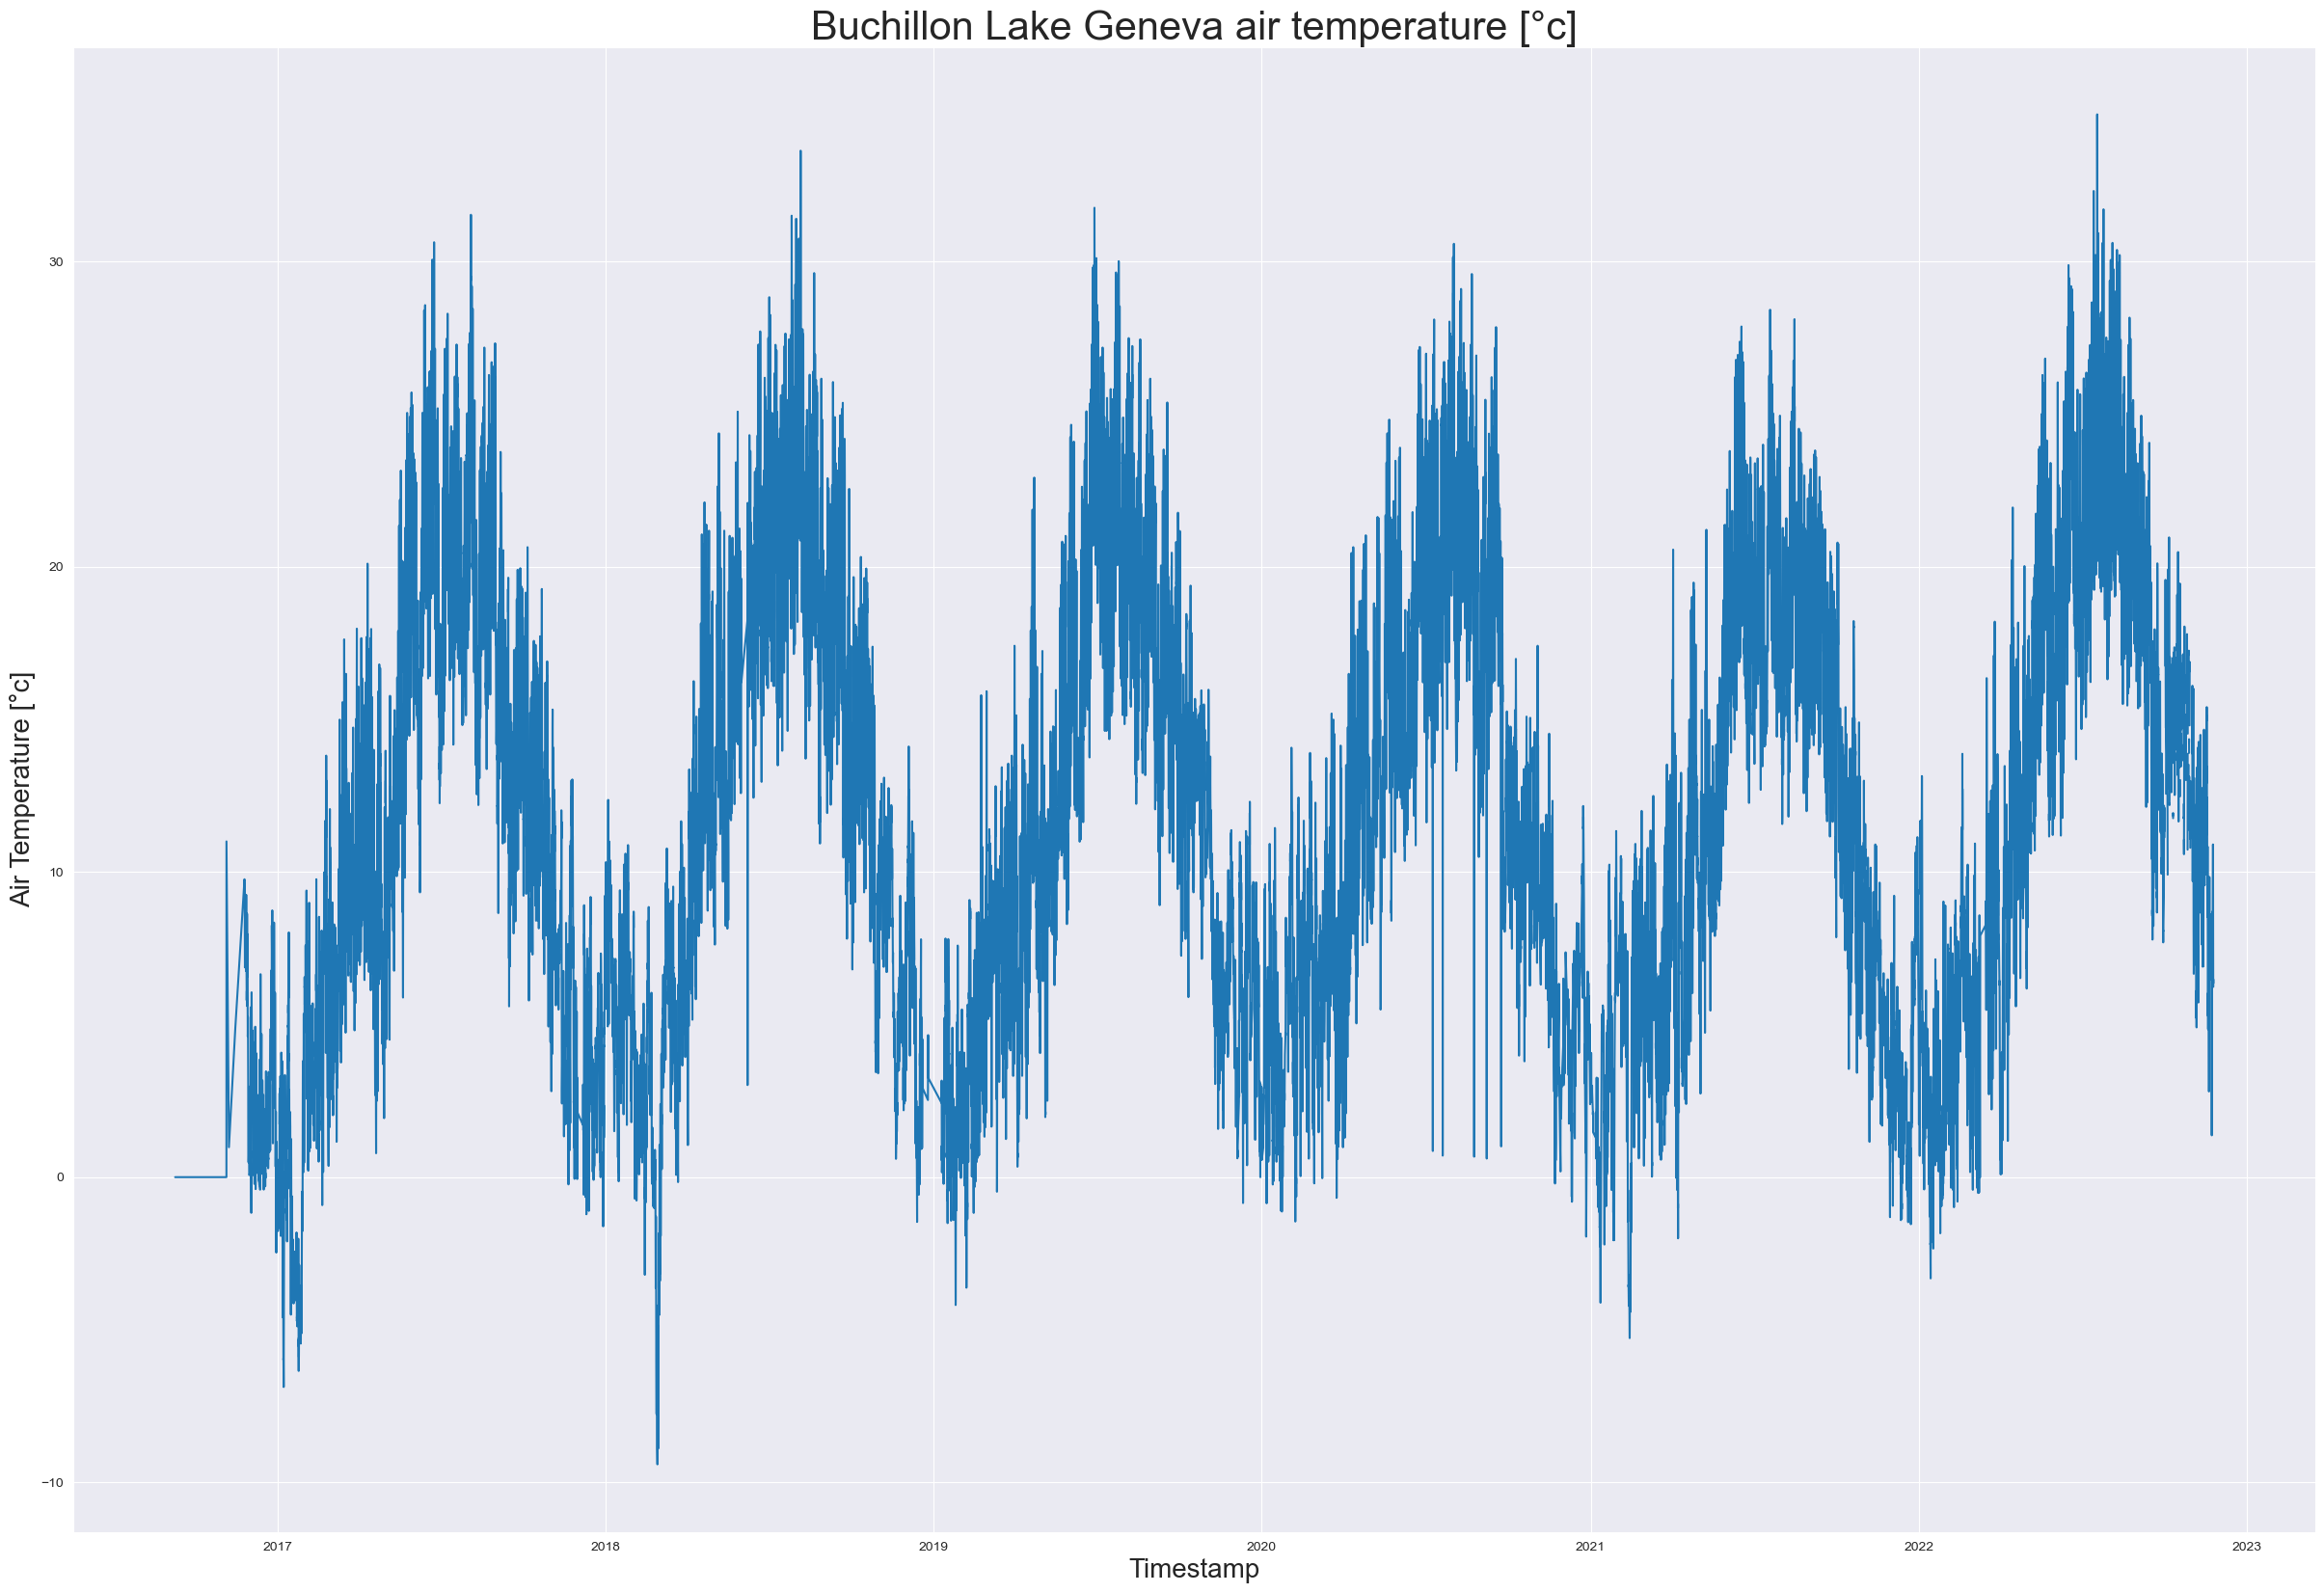

In [25]:
plt.plot(buchillon_skin_bulk_meteo['airtemp'])
plt.title("Buchillon Lake Geneva air temperature [°c]", fontsize = 30)
plt.ylabel("Air Temperature [°c]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

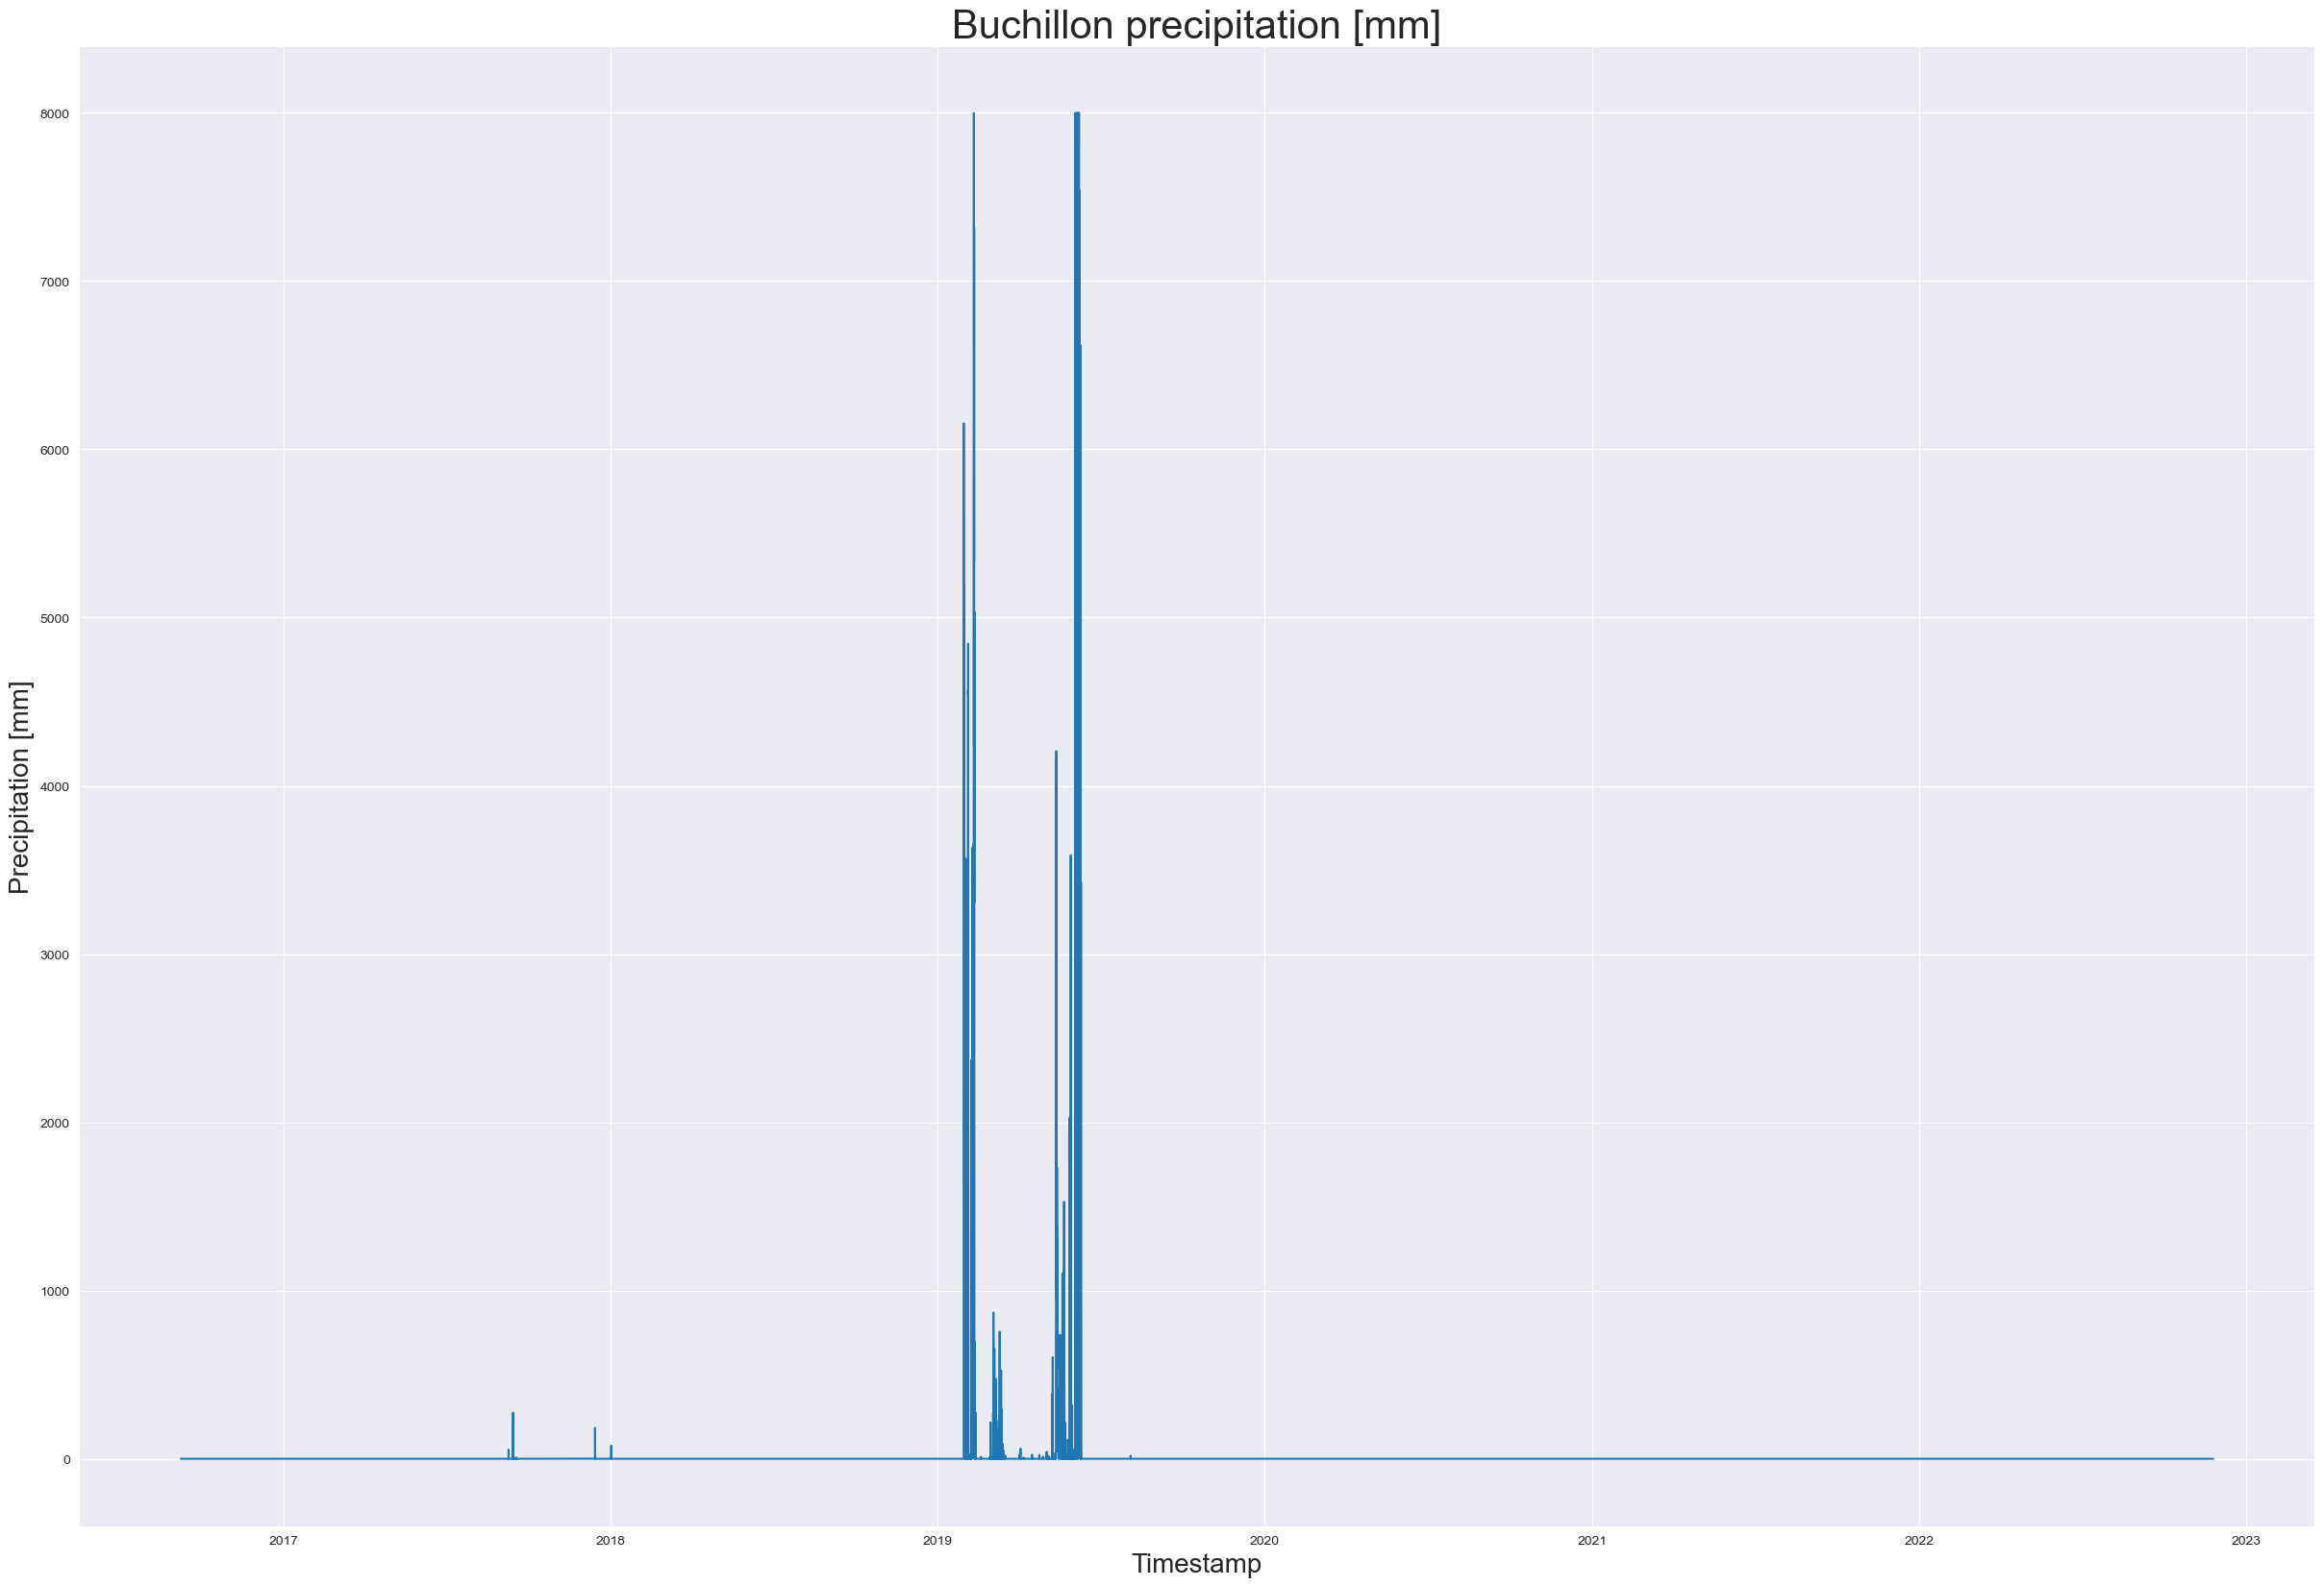

In [26]:
plt.title("Buchillon precipitation [mm]", fontsize = 30)
plt.ylabel("Precipitation [mm]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)
plt.plot(buchillon_skin_bulk_meteo['precipitation'])

Text(0.5, 0, 'Timestamp')

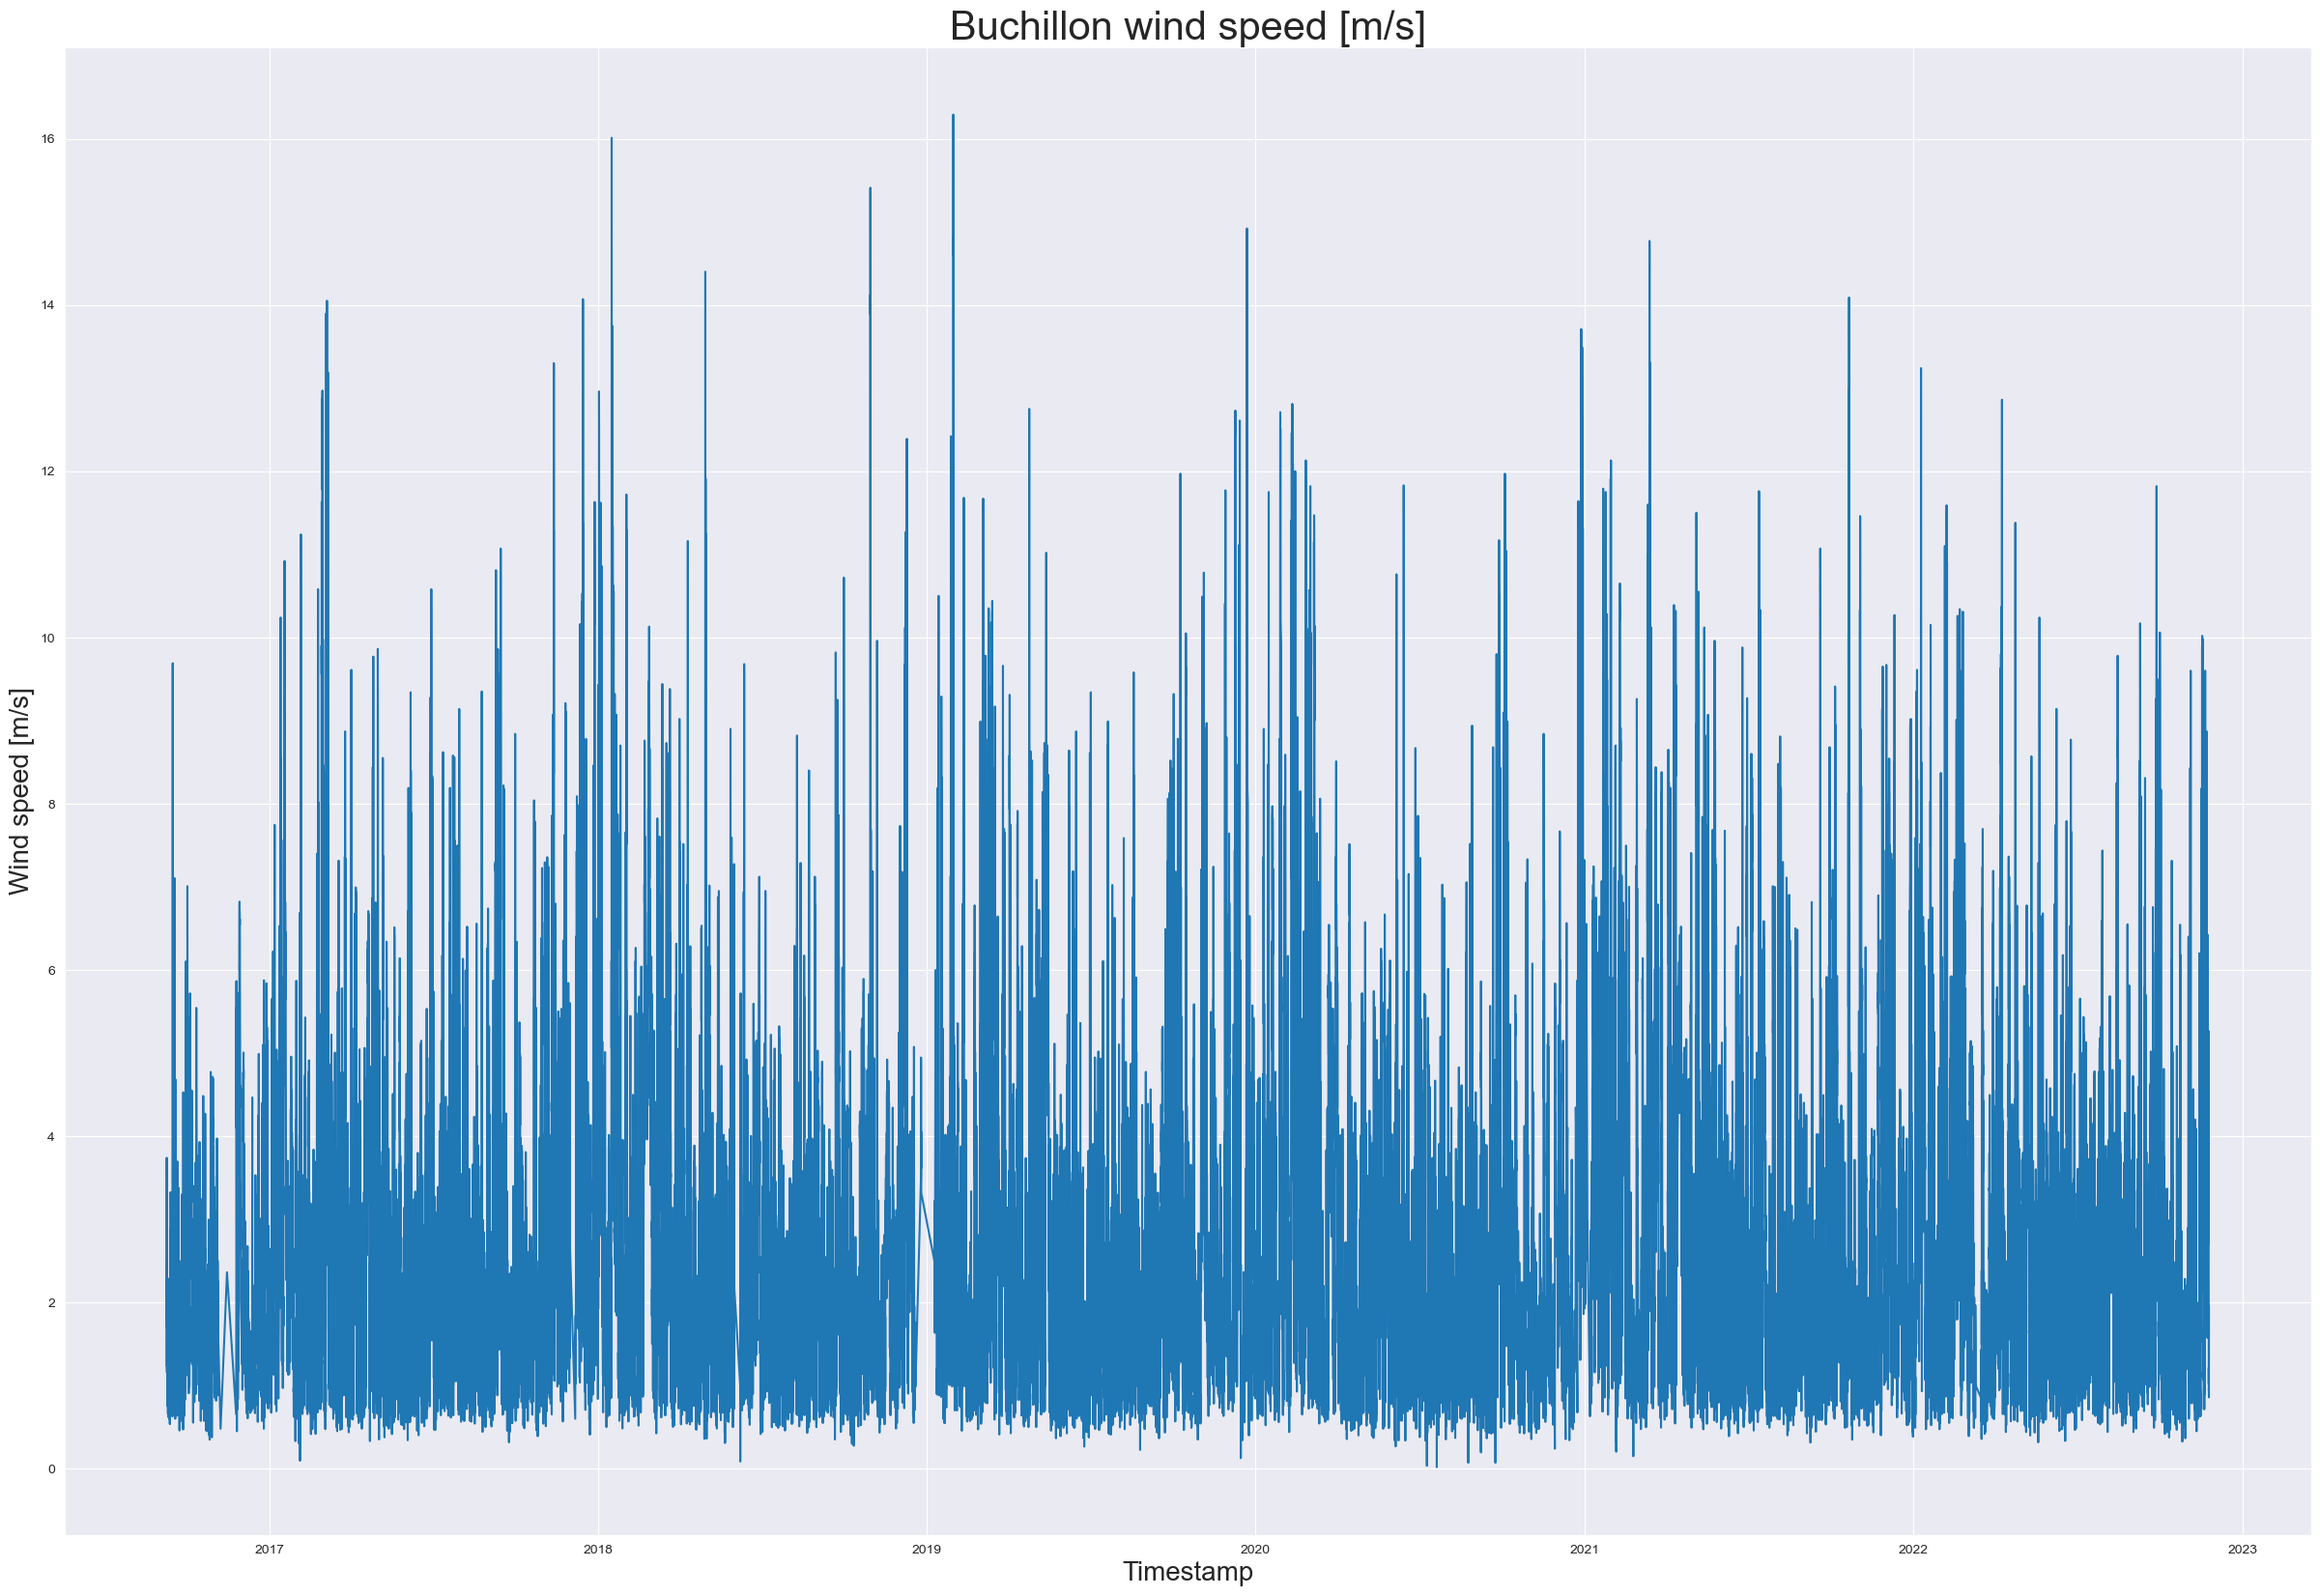

In [27]:
plt.plot(buchillon_skin_bulk_meteo['windspeed'])
plt.title("Buchillon wind speed [m/s]", fontsize = 30)
plt.ylabel("Wind speed [m/s]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

Text(0.5, 0, 'Timestamp')

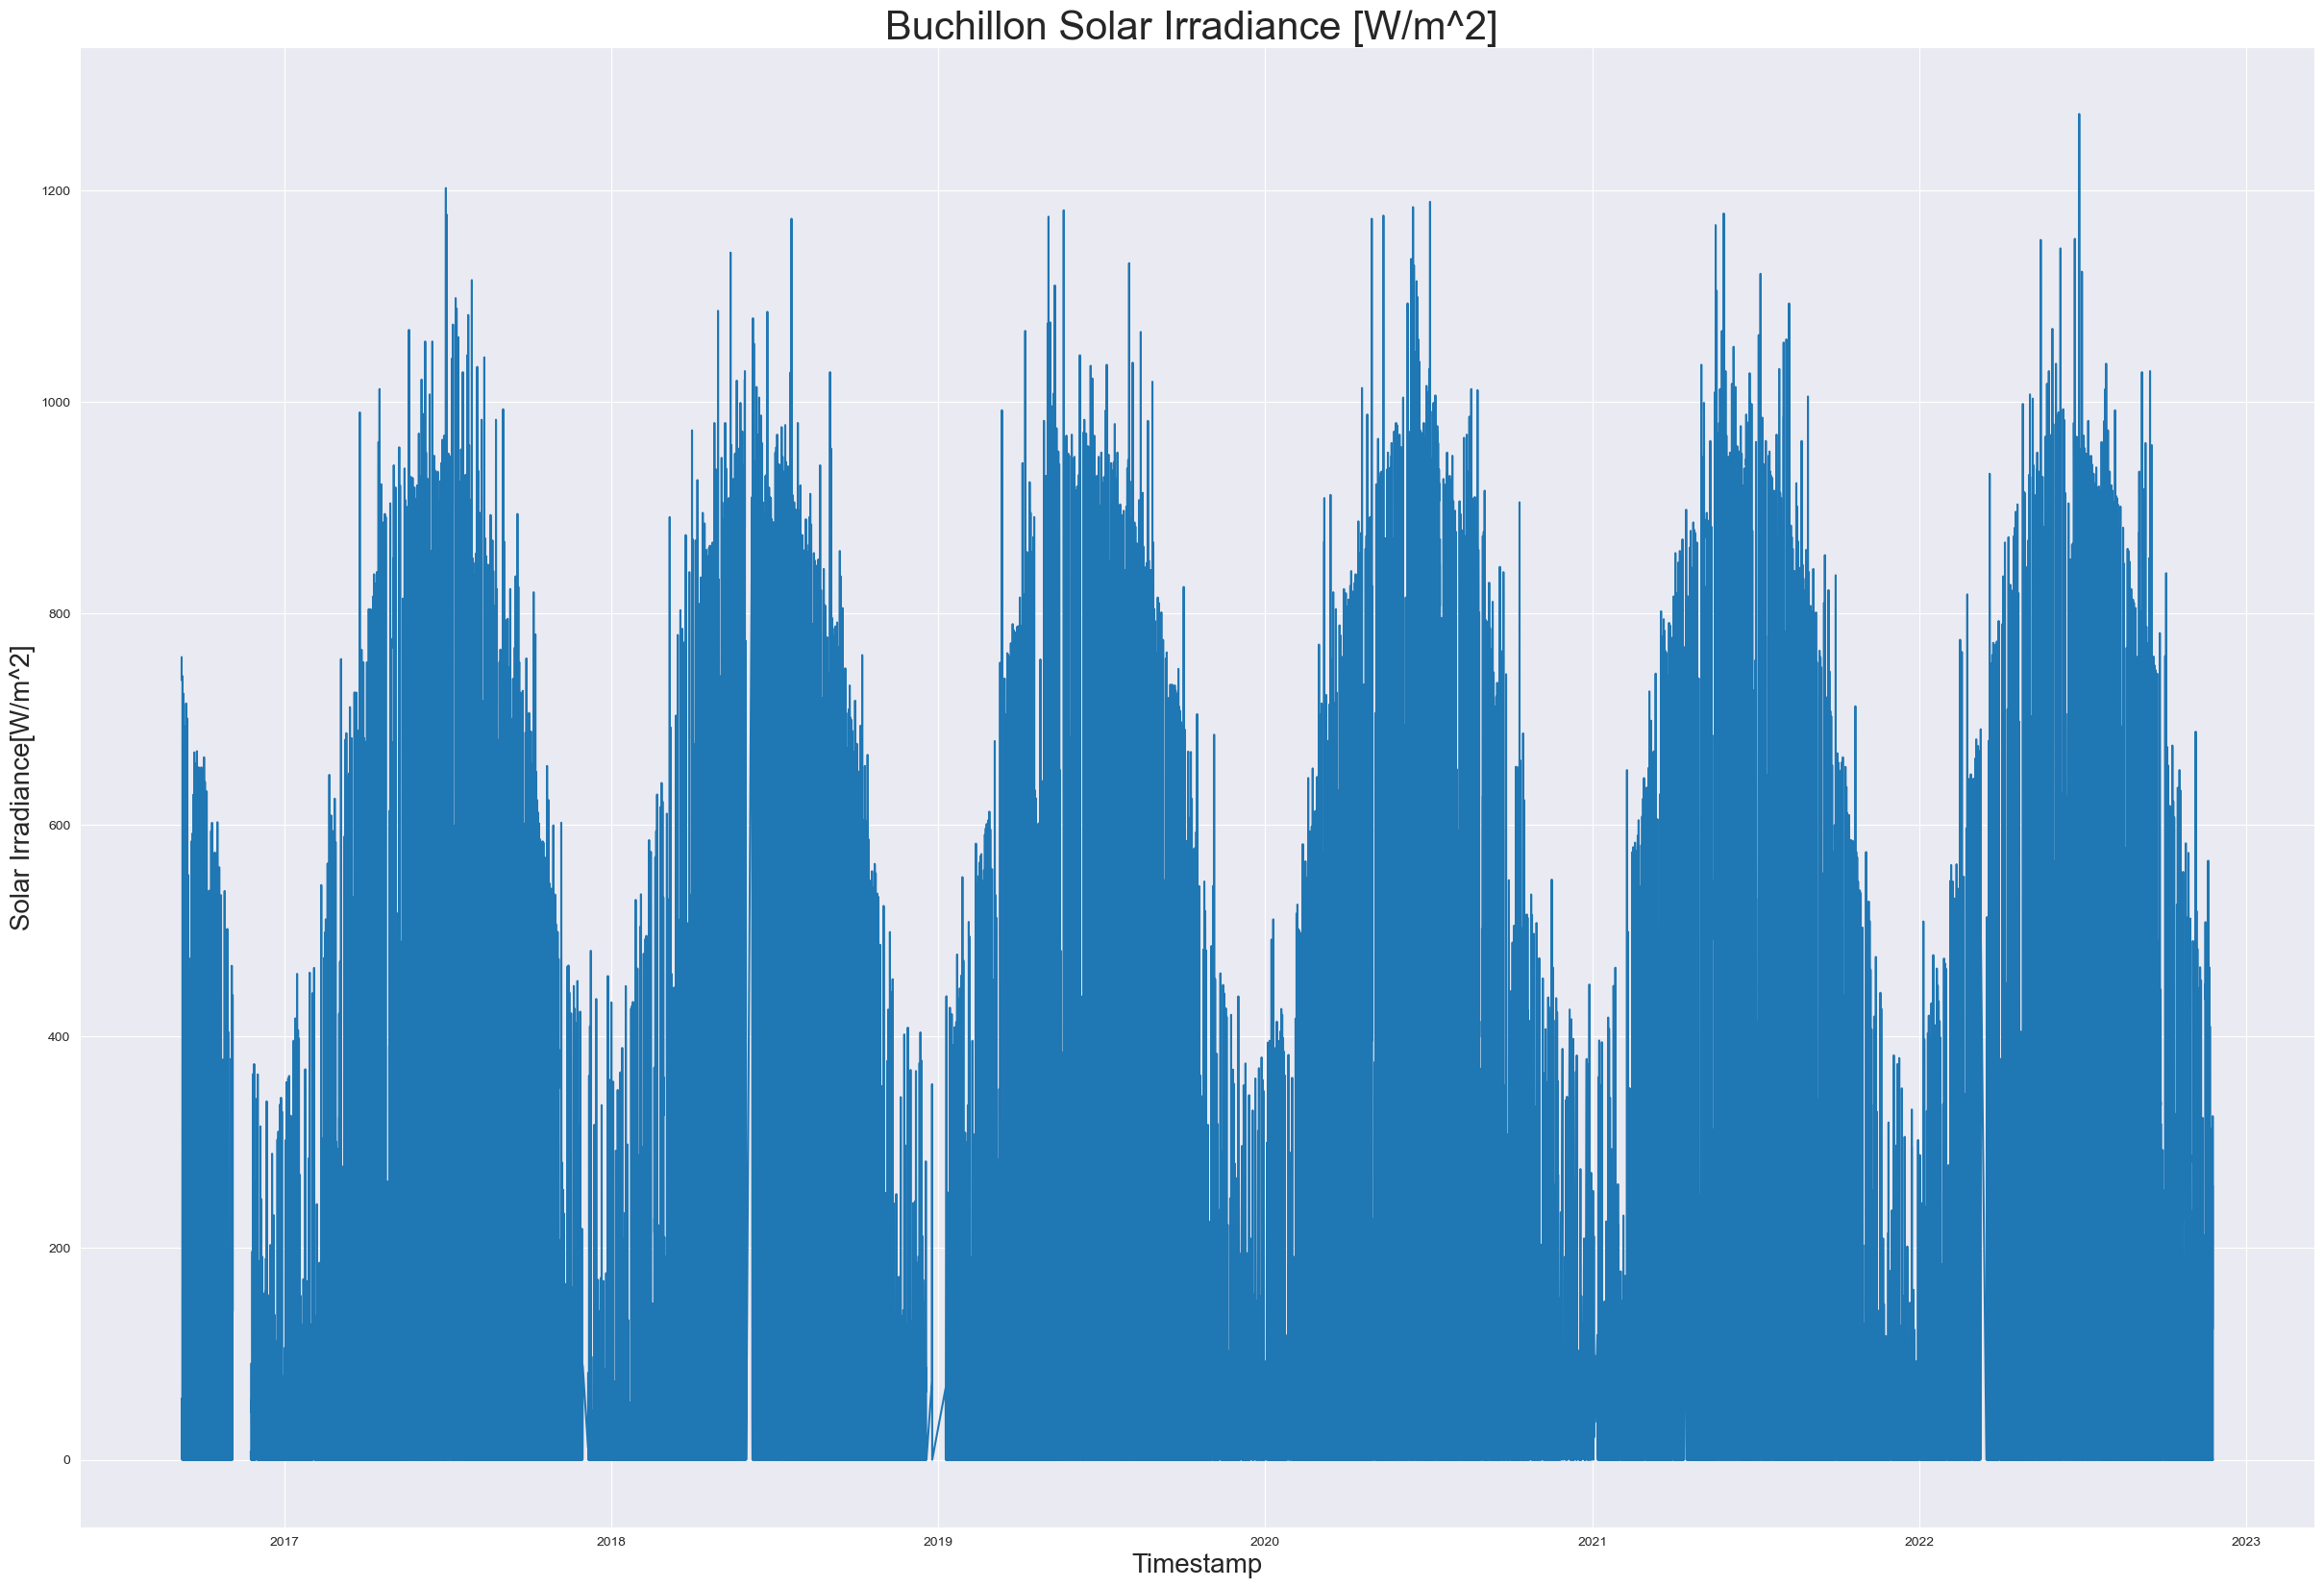

In [28]:
plt.plot(buchillon_skin_bulk_meteo['solar_W'])
plt.title("Buchillon Solar Irradiance [W/m^2] ", fontsize = 30)
plt.ylabel("Solar Irradiance[W/m^2]", fontsize = 20)
plt.xlabel("Timestamp", fontsize = 20)

In [41]:
x=buchillon_skin_bulk_meteo['bulktemp']-buchillon_skin_bulk_meteo['skintemp']
row = x.loc[x.index == pd.Timestamp('2018-03-01')]
train_set=x[:row.index[0]]
test_set=x[row.index[0]:]

count    10737.000000
mean         0.488838
std          1.191720
min         -6.370000
25%         -0.224000
50%          0.583000
75%          1.305000
max          4.827000
dtype: float64


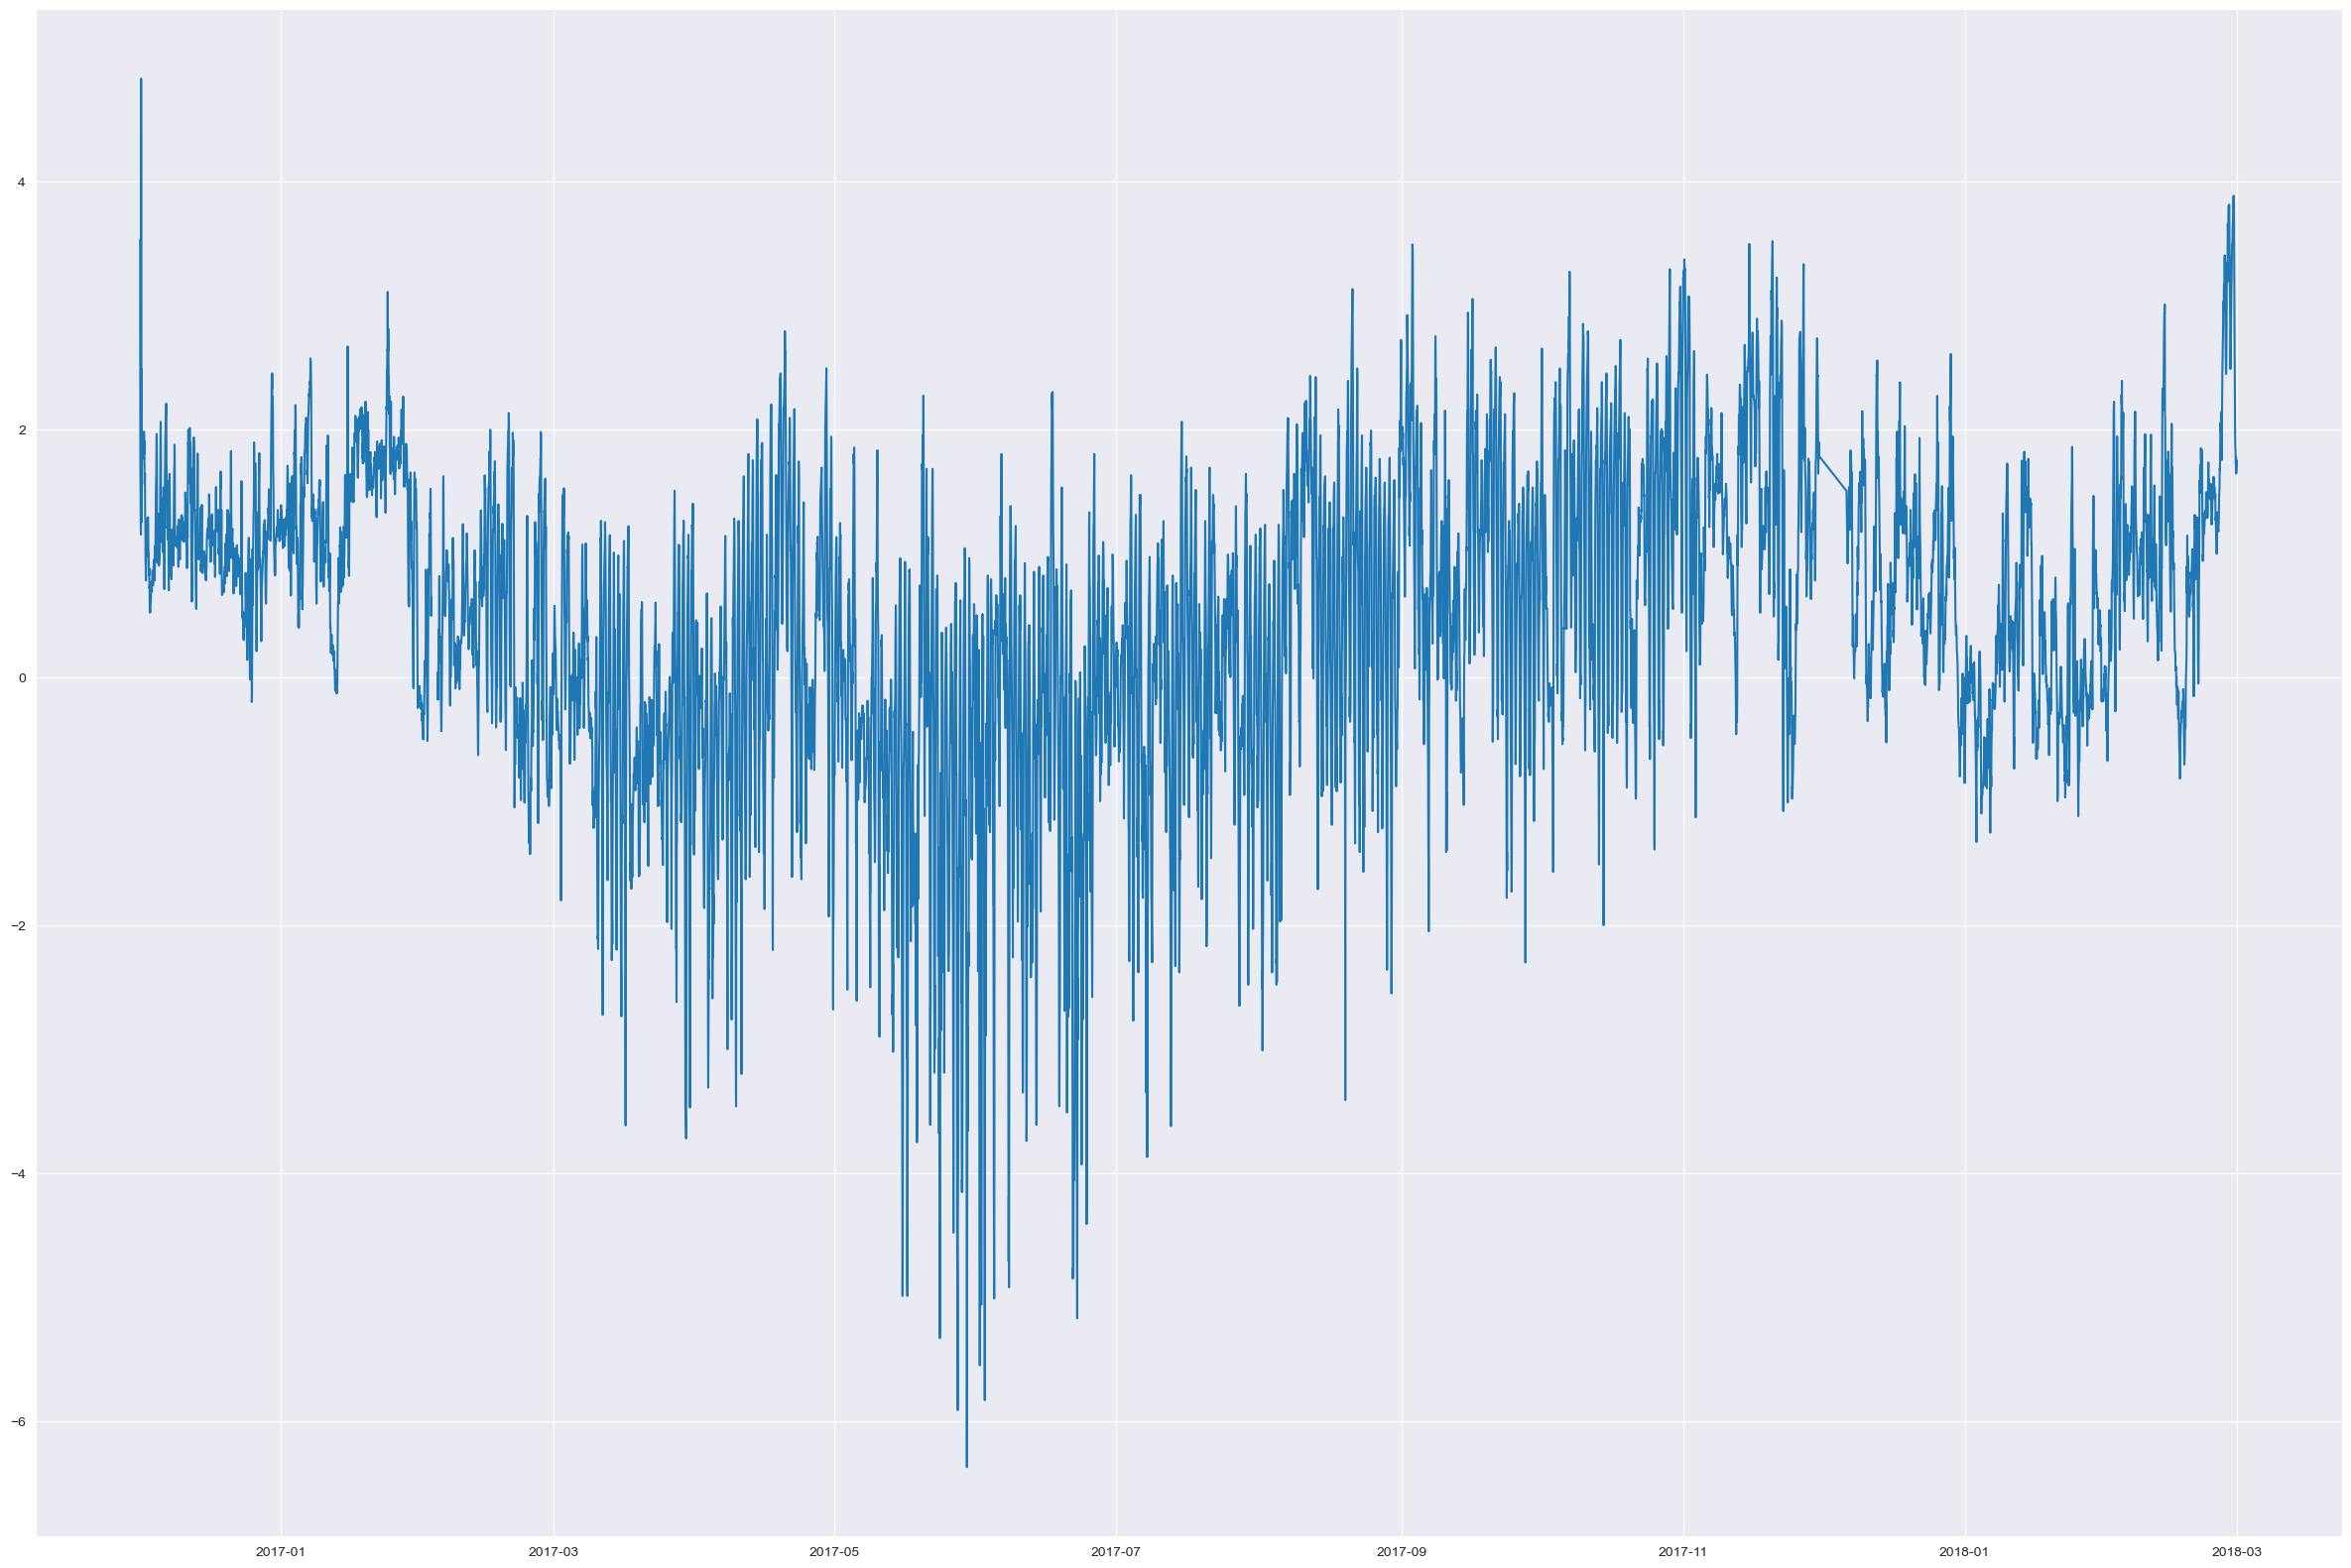

In [42]:
print(train_set.describe())
plt.plot(train_set)